## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_dropped = application_df.drop(columns = ['EIN', 'NAME', 'APPLICATION_TYPE'])
df_dropped.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
unique_values = df_dropped.nunique()
print(unique_values)

AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = df_dropped['CLASSIFICATION'].value_counts()
print(classification_counts)

# Determine a cutoff value for CLASSIFICATION
classification_cutoff_value = 100  # Adjust this value as needed

# Create a list of classifications to be replaced
classifications_to_replace = list(classification_counts[classification_counts < classification_cutoff_value].index)

# Replace in DataFrame
for cls in classifications_to_replace:
    df_dropped['CLASSIFICATION'] = df_dropped['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure replacement was successful
print(df_dropped['CLASSIFICATION'].value_counts())

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [5]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = df_dropped['CLASSIFICATION'].value_counts()
classification_counts_greater_than_one = classification_counts[classification_counts > 1]
print(classification_counts_greater_than_one)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64


In [6]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < classification_cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df_dropped['CLASSIFICATION'] = df_dropped['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df_dropped['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
Other,669
C1700,287
C4000,194


In [7]:
df_dropped.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(df_dropped)

In [9]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df_encoded.drop(columns="IS_SUCCESSFUL")
y = application_df_encoded["IS_SUCCESSFUL"]
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train,y_test = train_test_split(X,y, shuffle=True, random_state=42, test_size=0.2)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

input_features = len(X.columns)
hidden_nodes_1 = 512
hidden_nodes_2 = 256
hidden_nodes_3 = 128
hidden_nodes_4 = 64
hidden_nodes_5 = 32

nn = Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_1, input_dim=input_features, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_2, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_3, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_4, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Fifth hidden layer
nn.add(Dense(units=hidden_nodes_5, activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          20,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,553 (779.50 KB)

 Trainable params: 197,569 (771.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [12]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = nn.fit(X_train_scaled, y_train, epochs=300, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6312 - loss: 0.7006 - val_accuracy: 0.7125 - val_loss: 0.5826
Epoch 2/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6740 - loss: 0.6172 - val_accuracy: 0.7154 - val_loss: 0.5727
Epoch 3/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6999 - loss: 0.5963 - val_accuracy: 0.7145 - val_loss: 0.5739
Epoch 4/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6982 - loss: 0.5912 - val_accuracy: 0.7168 - val_loss: 0.5733
Epoch 5/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6985 - loss: 0.5872 - val_accuracy: 0.7156 - val_loss: 0.5738
Epoch 6/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7028 - loss: 0.5862 - val_accuracy: 0.7167 - val_loss: 0.5748
Epoch 7/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7068 - loss: 0.5851 - val_accuracy: 0.7165 - val_loss: 0.5677
Epoch 8/300
686/686 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7006 - loss: 0.5890 - va

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 2ms/step - accuracy: 0.7067 - loss: 0.5798
Loss: 0.5798460245132446, Accuracy: 0.7067055106163025


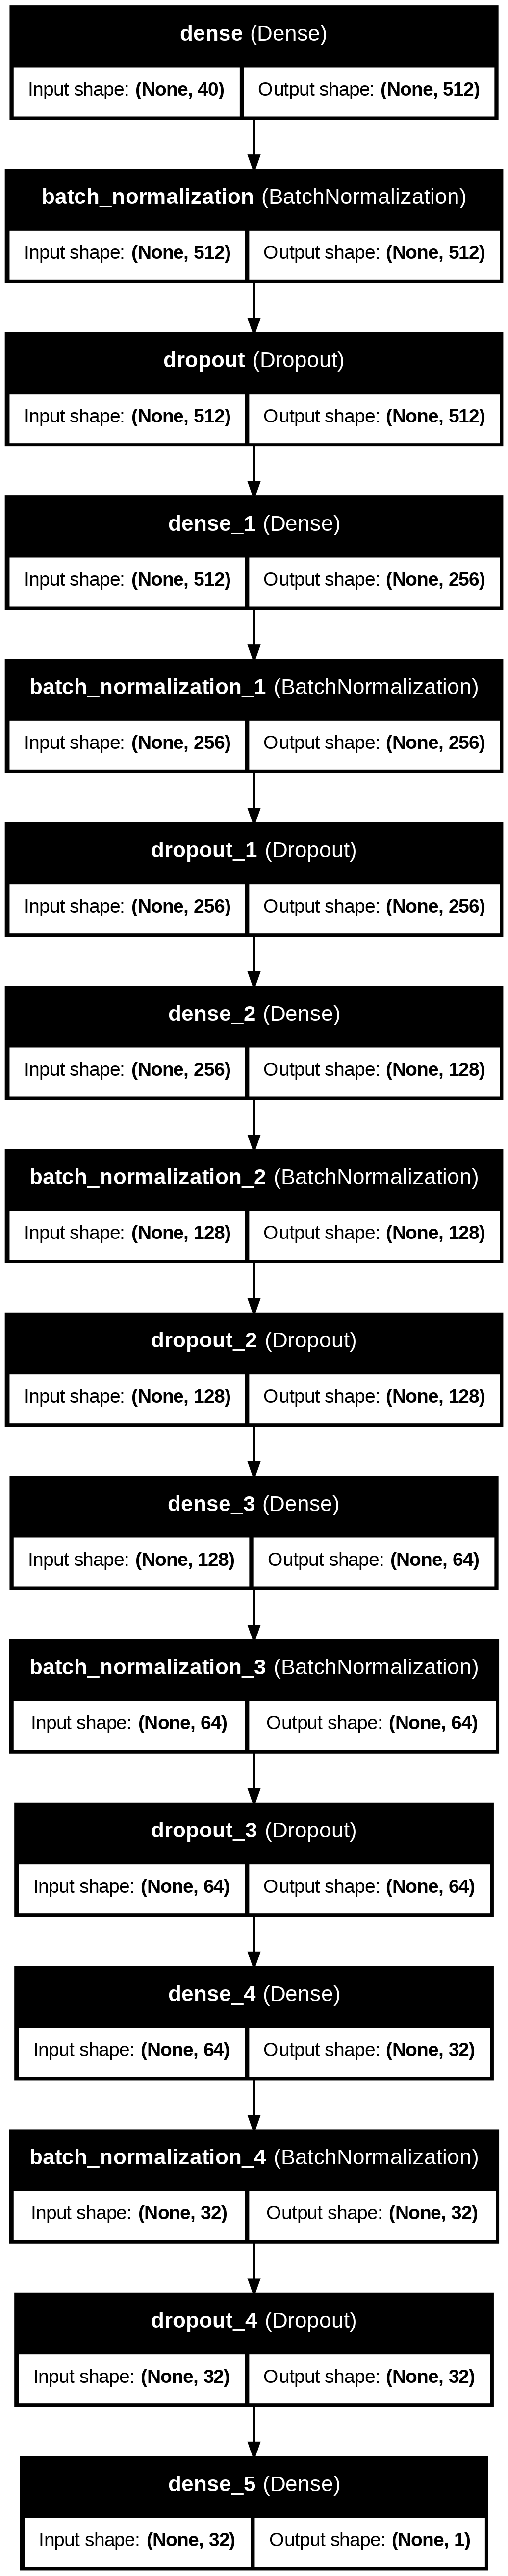

In [17]:
from tensorflow.keras.utils import plot_model
nn.save("AlphabetSoupCharity_Optimization.h5")
plot_model(nn, to_file='model_structure.png', show_shapes=True, show_layer_names=True)